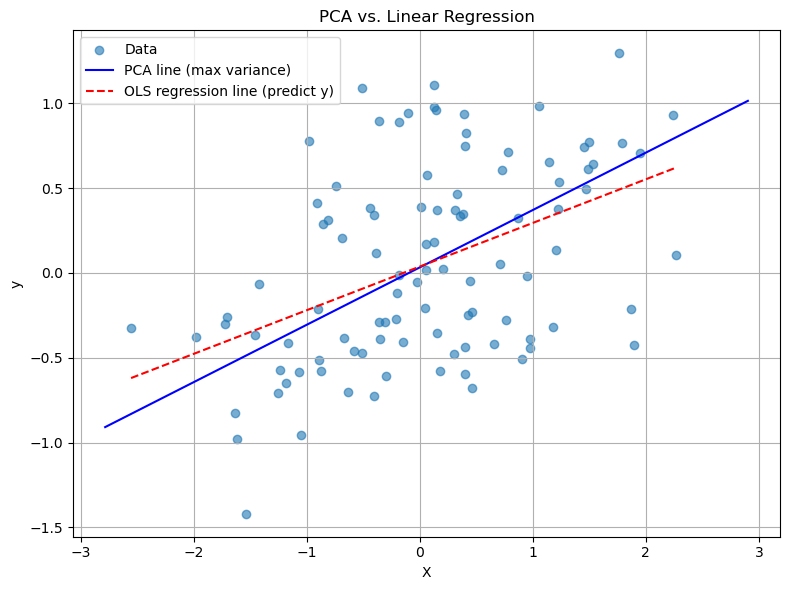

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Generate synthetic 2D data
np.random.seed(0)
X = np.random.randn(100, 1)
y = 0.2 * X[:, 0] + 0.5 * np.random.randn(100)  # weak correlation

# Stack X and y for PCA
XY = np.column_stack((X[:, 0], y))

# Fit PCA to the 2D data
pca = PCA(n_components=1)
pca.fit(XY)
pca_dir = pca.components_[0]
center = XY.mean(axis=0)
pca_line = np.outer(np.linspace(-3, 3, 100), pca_dir) + center

# Fit OLS regression
lr = LinearRegression()
lr.fit(X, y)
x_line = np.linspace(X.min(), X.max(), 100)
y_pred = lr.predict(x_line.reshape(-1, 1))

# Plot everything
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label='Data')
plt.plot(pca_line[:, 0], pca_line[:, 1], label='PCA line (max variance)', color='blue')
plt.plot(x_line, y_pred, label='OLS regression line (predict y)', color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("y")
plt.title("PCA vs. Linear Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Visual Example: PCA vs. Linear Regression

In the plot above, we compare the line fit by Principal Component Analysis (blue) with the line fit by ordinary least squares regression (red dashed). 

- **The blue line** represents the first principal component. It captures the direction of maximum variance in the combined space of X and y. PCA is unsupervised and does not use y during computation.
- **The red dashed line** is the OLS regression line, which predicts y from X by minimizing vertical squared error. This method explicitly uses the y-values as part of a supervised learning objective.

The two lines point in different directions because their optimization goals are distinct. PCA minimizes reconstruction error in the feature space, while OLS minimizes prediction error in the target variable. When the correlation between X and y is weak or indirect, the PCA and regression lines will diverge, as shown here.
